# A Recommendation System - Popularity Based

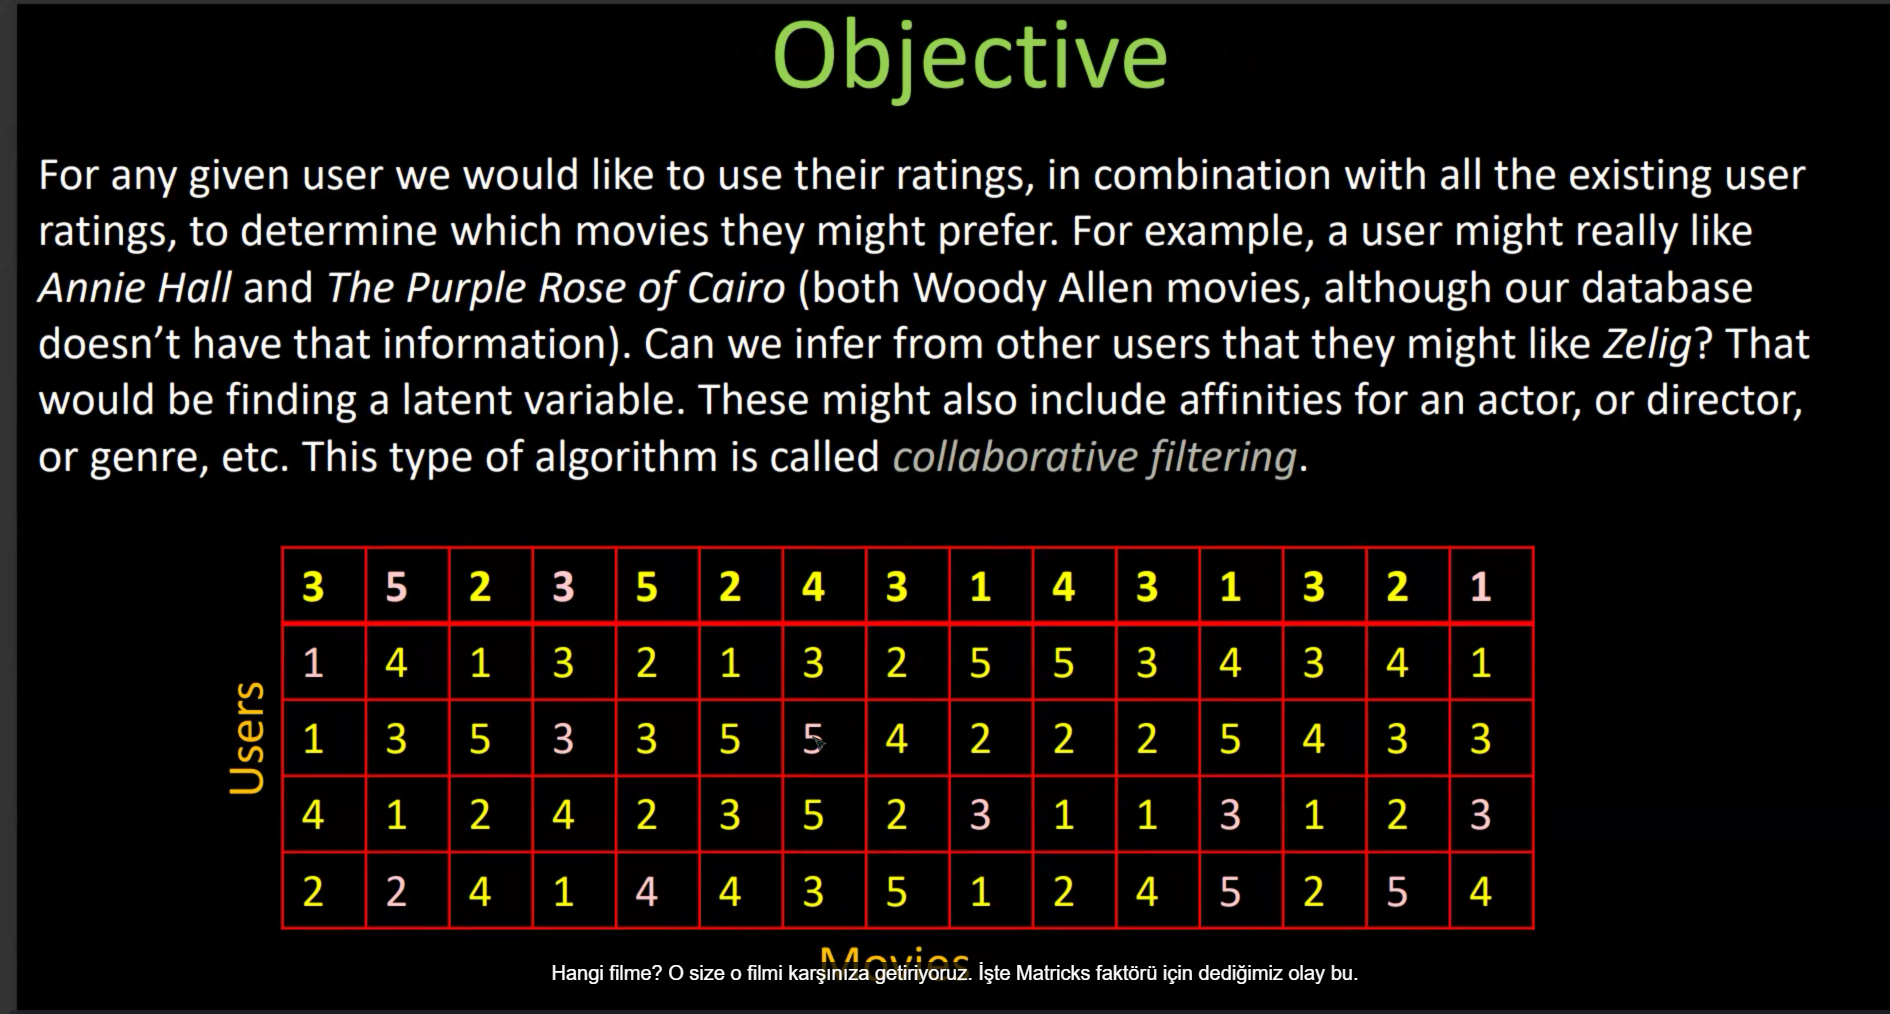

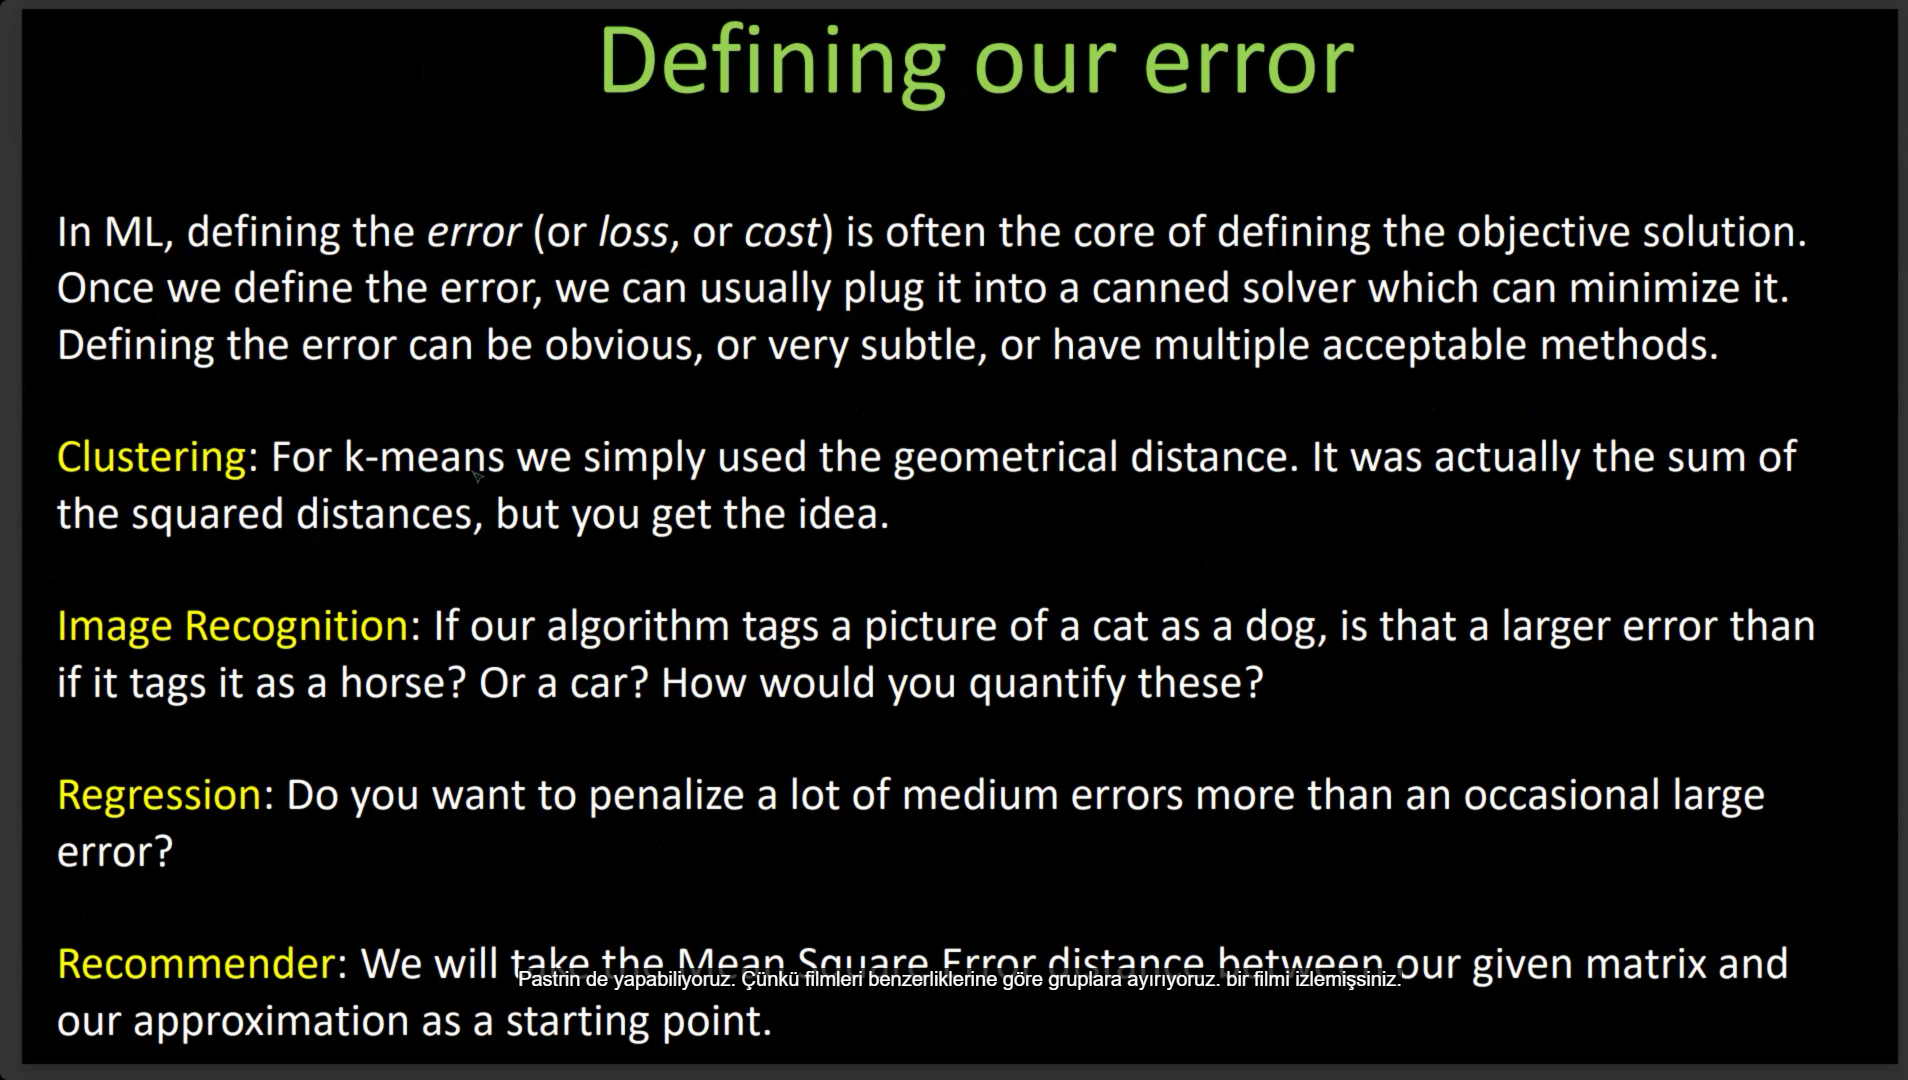

In [2]:
#https://grouplens.org/

In [3]:
#Popularity

In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings=pd.read_csv('ml-100k/u.data',sep='\t',header=None,usecols=range(3))

In [3]:
ratings.columns=['user_id','movie_id','rating']

In [4]:
ratings.head(9)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3


In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\ABD_YZ_Kursu\Day 11 Time Series Analyze

18.03.2024  00:20    <DIR>          .
18.03.2024  08:29    <DIR>          ..
17.03.2024  22:59    <DIR>          .ipynb_checkpoints
18.03.2024  00:20         2.603.789 A recommender system.ipynb
17.03.2024  10:50             1.163 adidas-quarterly-sales.csv
17.03.2024  10:50            78.199 DailyDelhiClimateTrain.csv
29.01.2016  23:26    <DIR>          ml-100k
               3 File(s)      2.683.151 bytes
               4 Dir(s)  26.006.794.240 bytes free


In [6]:
r_cols=['movie_id','title']
movies=pd.read_csv('ml-100k/u.item',encoding='iso-8859-1',sep='|',header=None,usecols=range(2),names=r_cols)

In [7]:
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
user=pd.read_table('ml-100k/u.user',sep='|',header=None,names=['Userid','age','gender','proffession','Zipcode'])
user.head()

,Userid,age,gender,proffession,Zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
ratings=pd.merge(movies,ratings)
ratings.title.value_counts()

title
Star Wars (1977)                                583
Contact (1997)                                  509
Fargo (1996)                                    508
Return of the Jedi (1983)                       507
Liar Liar (1997)                                485
                                               ... 
Tigrero: A Film That Was Never Made (1994)        1
Eye of Vichy, The (Oeil de Vichy, L') (1993)      1
Promise, The (Versprechen, Das) (1994)            1
To Cross the Rubicon (1991)                       1
Scream of Stone (Schrei aus Stein) (1991)         1
Name: count, Length: 1664, dtype: int64

In [10]:
ratings.movie_id.nunique()

1682

In [11]:
import numpy as np
movie_grouped=ratings.groupby('title').agg({'rating':[np.size,np.sum,np.mean]})

In [14]:
movies.iloc[241]

movie_id             242
title       Kolya (1996)
Name: 241, dtype: object

In [13]:
user.iloc[195]

Userid            196
age                49
gender              M
proffession    writer
Zipcode         55105
Name: 195, dtype: object

In [12]:
movie_grouped

rating               
                                        size  sum      mean
title                                                      
'Til There Was You (1997)                  9   21  2.333333
1-900 (1994)                               5   13  2.600000
101 Dalmatians (1996)                    109  317  2.908257
12 Angry Men (1957)                      125  543  4.344000
187 (1997)                                41  124  3.024390
...                                      ...  ...       ...
Young Guns II (1990)                      44  122  2.772727
Young Poisoner's Handbook, The (1995)     41  137  3.341463
Zeus and Roxanne (1997)                    6   13  2.166667
unknown                                    9   31  3.444444
Á köldum klaka (Cold Fever) (1994)         1    3  3.000000

[1664 rows x 3 columns]

In [22]:
popular_movies=movie_grouped.sort_values(('rating','mean'),ascending=False)

In [23]:
popular_movies.head()

rating         
                                             size sum mean
title                                                     
They Made Me a Criminal (1939)                  1   5  5.0
Marlene Dietrich: Shadow and Light (1996)       1   5  5.0
Saint of Fort Washington, The (1993)            2  10  5.0
Someone Else's America (1995)                   1   5  5.0
Star Kid (1997)                                 3  15  5.0

In [29]:
grouped_sum=movie_grouped['rating']['sum'].sum()

In [30]:
grouped_sum

352986

In [31]:
popular_movies['percentage']=movie_grouped['rating']['sum'].div(grouped_sum)*100

In [32]:
popular_movies.head(9)

rating          percentage
                                             size sum mean           
title                                                                
They Made Me a Criminal (1939)                  1   5  5.0   0.001416
Marlene Dietrich: Shadow and Light (1996)       1   5  5.0   0.001416
Saint of Fort Washington, The (1993)            2  10  5.0   0.002833
Someone Else's America (1995)                   1   5  5.0   0.001416
Star Kid (1997)                                 3  15  5.0   0.004249
Great Day in Harlem, A (1994)                   1   5  5.0   0.001416
Aiqing wansui (1994)                            1   5  5.0   0.001416
Santa with Muscles (1996)                       2  10  5.0   0.002833
Prefontaine (1997)                              3  15  5.0   0.004249

In [33]:
popular_movies.sort_values(('percentage'),ascending=False)

rating                 percentage
                                            size   sum      mean           
title                                                                      
Star Wars (1977)                             583  2541  4.358491   0.719859
Fargo (1996)                                 508  2111  4.155512   0.598041
Return of the Jedi (1983)                    507  2032  4.007890   0.575660
Contact (1997)                               509  1936  3.803536   0.548464
Raiders of the Lost Ark (1981)               420  1786  4.252381   0.505969
...                                          ...   ...       ...        ...
Getting Away With Murder (1996)                1     1  1.000000   0.000283
The Courtyard (1995)                           1     1  1.000000   0.000283
Promise, The (Versprechen, Das) (1994)         1     1  1.000000   0.000283
JLG/JLG - autoportrait de décembre (1994)      1     1  1.000000   0.000283
Crude Oasis, The (1995)                        1     1  1.000000   0.000283

[1664 rows x 4 columns]

In [36]:
popular_movies[popular_movies['percentage']>=.1].sort_values(('rating','mean'),ascending=False)

rating                 percentage
                                         size   sum      mean           
title                                                                   
Close Shave, A (1995)                     112   503  4.491071   0.142499
Schindler's List (1993)                   298  1331  4.466443   0.377069
Wrong Trousers, The (1993)                118   527  4.466102   0.149298
Casablanca (1942)                         243  1083  4.456790   0.306811
Shawshank Redemption, The (1994)          283  1258  4.445230   0.356388
...                                       ...   ...       ...        ...
Volcano (1997)                            219   615  2.808219   0.174228
Beavis and Butt-head Do America (1996)    156   435  2.788462   0.123234
George of the Jungle (1997)               162   435  2.685185   0.123234
Batman Returns (1992)                     142   381  2.683099   0.107936
Spawn (1997)                              143   374  2.615385   0.105953

[328 rows x 4 columns]

In [41]:
popular_movies['Rank']=popular_movies['percentage'].rank(ascending=False)

In [42]:
popular_movies.head()

rating          percentage    Rank
                                             size sum mean                   
title                                                                        
They Made Me a Criminal (1939)                  1   5  5.0   0.001416  1488.5
Marlene Dietrich: Shadow and Light (1996)       1   5  5.0   0.001416  1488.5
Saint of Fort Washington, The (1993)            2  10  5.0   0.002833  1391.0
Someone Else's America (1995)                   1   5  5.0   0.001416  1488.5
Star Kid (1997)                                 3  15  5.0   0.004249  1298.5